# STAT207 Final Project - A Scout's Life

Veer Pareek

## 1. Introduction

### **Motivation:**
I am a huge NFL fan and have always wondered how scouts make such good decisions when deciding who to draft. Is it purely genetics or is it the amount of hard work and dedication you put in? Are there some statistics that can show if a player has potential to be a star in the league. I want to do a deep dive into statistics to see if there is an accurate way to predict if a player has the potential to be a superstar.

### **Research Questions and Overview:**

<br>**Descriptive Analytics:**<br><br>

**Q1: What is the relationship between height and catch percentage (CTCH%) in this dataset?**
In the NFL, height is a key factor for a wide reciever, because this can lead them to win 1 on 1 matchups with a cornerback. This question can show how the catch percentage can be affected by how tall a player is born. I will answer this question using descriptive analytics and different visualizations to see the relationship between the two categories.

**Q2: What is the relationship between average seperation and catch percentage (CTCH%) in this dataset?**
In the NFL, seperation is how far a reciever can get from the person covering them, this usually comes with practice. This question can show how the catch percentage can be affected by how much a player trains. I will answer this question using descriptive analytics and different visualizations to see the relationship between the two categories. 

**Q3: What is the relationship between position and catch percentage (CTCH%) in this dataset?**
In the NFL, the people who catch the balls are usually either tight ends or wide recievers (or running backs but there are none in the dataset). This question can show how the catch percentage can be affected by what position a player is. I would expect a WR to have a higher percentage but lets see.| I will answer this question using descriptive analytics and different visualizations to see the relationship between the two categories.

**Q4: And furthermore, how does this relationship between height and catch percentage (CTCH%) change for players who play different positions?**
This question begs the question that if a player plays a different position (WR/TE/RB), then they will be able to catch the ball better if they are taller. It will allow scouts to get a better sense of who to draft. I will answer this question using descriptive analytics and different visualizations to see the relationship between the two categories.

<br>**Inference:**<br><br>

**Q5: Is there sufficient evidence to suggest that there is an association between catch percentage and being a higher targer reciever (generates > 18% of teams air yards) in all NFL recievers?**<br>
This question is important because it asks if a player gets more targets in an offense, then will their catch percentage be higher. This could be important for NFL scouts because if a player is a star at a smaller school and the only player who is producing on offense, then is that the reason for their increased performance. How will that translate to the NFL when they are recieving a smaller portion of the balls. I will do this by conducting sampling difference of sample means test to find the answer.

<br>**Linear Regression:**<br><br>

**Q6: Is there a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in the sample?**
I want to see if I can prove that recieving yards are correlated to catch percentage, targeted air yards percentage, yards after catch per reception, and seperation. I want to see this because it could show which stats are most important for scouts to look at when a player is coming out of college. I will find the answer by finding the correlation coefficients and visualizing their relationships through scatterplots.

**Q7:Is there sufficient evidence to suggest that there is a linear relationship between
YDS and CTCH%,TAY%,YAC/R, and SEP in all NFL recievers?**
I want to take the last question and see if I can apply it to all NFL recievers. This will allow scouts to trust these predictions and deem if they are reliable to be used on college recievers. I will find this by using linear regression to find which of the relationships have a slope of non-zero, or are linear for all cases.

<br>**Logistic Regression:**<br><br>

**Q8: What explanatory variables should we include in the model that predicts if a player will have a higher catch percentage to build a parsimonious model?**
I want to answer this question to find the most efficient way to predict catch percentage. If I can find the right combination of variables to most accurately predict catch percentage, scouts can use this model on prospects. I will find this out by using Logistic regression, training and testing sets, a ROC and AUC, as well as a classifier and confusion matrix.

**Q9: Is there a linear relationship between the log-odds of the success level of Catch Percentage and Average Seperation,Height,Average Cushion, and Targeted Air Yards in all NFL Wide Recievers?**
Finding if there is a linear relationship between the log-odds of the success of catch percentage is important because it can make or break a reciever. I took a good catch percentage to mean above average in this case. Can using the different statistics find if the reciever will be considered "good" in the NFL. I will find out by running Logistic Regression and examining the p-values!

### **Dataset:**

<br>Below, you will see the dataset I plan on using throughout the course of this analysis. I started by gathering the NFL Next Gen Stats dataset from the official NFL website, which I named df_ngs, and the NFL body and weight dataset from the NFL website, which I named df_body. After taking a glance at the body dataframe I realized that I needed to do some cleaning and manipulation before it was ready to merge with the Next Gen Stat dataframe. There were 3 main problems with the body dataset. First, I knew I needed to merge the two dataframes on the player name, because there were more players in the body dataset than the next gen stat dataset, but, they were formatted differently. So I wrote a function to change the name to the same format so they could be merged. Second, I realized that the Height, which is a variable I need to use for analysis, was formatted as a string in the format ft'in". I could not do much with that so I converted it to an integer of the players height in inches. Third, I also realized the weight was a string so I removed the "lbs" and made it an integer. Finally, I merged the two datasets on the player name and reorganized the columns for readability and to get rid of duplicates. You will see the finished product as df in the last cell of the introduction section.

Here is a quick overview of the different columns:

**PLAYER_NAME** : Name
<br>**TEAM** : Team
<br>**POS** : Position
<br>**Num** : Jersey Number
<br>**Height** : Height (in inches)
<br>**Weight** : Weight (in lbs)
<br>**DOB** : Date of Birth
<br>**REC** : Receptions
<br>**TAR** : Targets
<br>**YDS** : Yards
<br>**TD** : Touchdowns
<br>**CUSH** : Average Cushion
<br>**SEP** : Average Seperation
<br>**TAY** : Average Targeted Air Yards
<br>**TAY%** : % Share of Team's Air Yards
<br>**CTCH%** : Catch Percentage
<br>**YAC/R** : Average Yards After Catch Per Reception
<br>**xYAC/R** : Average Expected Yards After Catch Per Reception
<br>**+/-** : Average Yards After Catch Above Excpectation

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom, bernoulli, t, f
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [7]:
df_ngs = pd.read_csv('NFL_NGS2022.csv')
df_ngs = df_ngs.drop(columns='Unnamed: 15')
df_ngs.head()

,PLAYER NAME,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-
0,Tyreek Hill,MIA,WR,6.6,3.5,11.6,38.27,87,115,75.65,1233,4,4.7,4.0,0.6
1,Justin Jefferson,MIN,WR,5.6,3.2,10.3,42.62,81,116,69.83,1232,5,5.8,4.6,1.2
2,Stefon Diggs,BUF,WR,5.5,3.0,11.2,37.93,84,119,70.59,1110,9,4.3,3.4,0.9
3,Davante Adams,LV,WR,5.8,3.3,11.2,41.20,71,123,57.72,999,10,5.3,4.7,0.5
4,Jaylen Waddle,MIA,WR,6.2,3.1,11.8,28.92,56,85,65.88,963,6,6.2,4.5,1.7


In [26]:
df_body = pd.read_csv('nfl_height_weight.csv').rename(columns={"Player": "PLAYER NAME"})
df_body.head()

,PLAYER NAME,Pos,Team,Num,Height,Weight,DOB
0,"Abdullah, Ameer",RB,LV,22,"5'9""",203 lbs,6/13/93
1,"Aboushi, Oday",G,LAR,63,"6'5""",315 lbs,6/5/91
2,"Adams, Andrew",DB,TEN,47,"5'11""",205 lbs,10/28/92
3,"Adams, Davante",WR,LV,17,"6'1""",215 lbs,12/24/92
4,"Adams, Jamal",S,SEA,33,"6'1""",213 lbs,10/17/95


In [ ]:
#Name formatting the same for both df
for i in range(df_body.shape[0]):
    #Changing the name to match format
    name = df_body['PLAYER NAME'].iloc[i]
    x = name.split(', ')
    x.reverse()
    new_name = ' '.join(x)
    df_body['PLAYER NAME'] = df_body['PLAYER NAME'].replace(name, new_name)
    
    #Changing the Height from string ft."in.' to in. integer
    height = df_body['Height'].iloc[i]
    if (isinstance(height, int) == False):
        height_split = height.split('\'')
        ft, inch = (height_split[0], height_split[1].split('"')[0])
        ft = int(ft)
        inch = int(inch)
        height_new = ft*12 + inch
        df_body['Height'] = df_body['Height'].replace(height, height_new)
        
    #Changing the Weight from string with lbs to integer
    weight = df_body['Weight'].iloc[i]
    if (isinstance(weight, int) == False):
        weight_split = weight.split(' ')
        num = (weight_split[0])
        new_weight = int(num)
        df_body['Weight'] = df_body['Weight'].replace(weight, new_weight)

In [202]:
#checking to see if name, height and weight were successfully changed
df_body.head()

,PLAYER NAME,Pos,Team,Num,Height,Weight,DOB
0,Ameer Abdullah,RB,LV,22,69,203,6/13/93
1,Oday Aboushi,G,LAR,63,77,315,6/5/91
2,Andrew Adams,DB,TEN,47,71,205,10/28/92
3,Davante Adams,WR,LV,17,73,215,12/24/92
4,Jamal Adams,S,SEA,33,73,213,10/17/95


In [29]:
df = df_ngs.merge(df_body, on='PLAYER NAME') #Merging the body and next gen stats dataframes on player name (inner)
new_cols = ["PLAYER NAME", "TEAM", "POS", "Num", "Height", "Weight", "DOB", "REC", "TAR", "YDS",
            "TD", "CUSH", "SEP", "TAY", "TAY%", "CTCH%", "YAC/R", "xYAC/R", "+/-"]
df=df.reindex(columns=new_cols) #For readability

In [30]:
df.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,TD,CUSH,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,4,6.6,3.5,11.6,38.27,75.65,4.7,4.0,0.6
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,5,5.6,3.2,10.3,42.62,69.83,5.8,4.6,1.2
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,9,5.5,3.0,11.2,37.93,70.59,4.3,3.4,0.9
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,10,5.8,3.3,11.2,41.20,57.72,5.3,4.7,0.5
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,7,5.5,2.6,10.8,40.62,61.63,6.6,5.1,1.6


## 2. Descriptive Analytics

### Overview

The following research questions will be answered in this section:

**Q1. What is the relationship between height and catch percentage (CTCH%) in this dataset?**

**Q2: What is the relationship between average seperation and catch percentage (CTCH%) in this dataset?**

**Q3: What is the relationship between position and catch percentage (CTCH%) in this dataset?**

**Q4: And furthermore, how does this relationship between seperation and catch percentage (CTCH%) change for players who play different positions?**

I chose to do analysis on 4 seperate variables throughout this section. Originally I wanted to make this section about the relationship between height and catch percentage, but to my surprise, there was not a very strong relationship. Instead I decided to examine the relationship between seperation and catch percentage for different pass-catching positions. This could influence a NFL analyst/scout to make a decision of which position they want to look for in the draft.

### Q1

In [31]:
#Function to get all summary statistics for a column
def summary(series):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std', 'var', 'range']
    value = [series.min(),
            series.quantile(q=0.25),
            series.median(),
            series.quantile(q=0.75),
            series.max(),
            series.mean(),
            series.std(),
            series.var(),
            series.max()-series.min()]
    return pd.DataFrame({'value' : value}, index=index).round(3)

In [32]:
#Summary Statistics of height in inches
summary(df['Height'])

,value
min,67.000
Q1,72.000
med,74.000
Q3,76.000
max,78.000
mean,73.830
std,2.758
var,7.605
range,11.000


In [33]:
#Summary Statistics of catch percentage
summary(df['CTCH%'])

,value
min,50.000
Q1,61.970
med,67.530
Q3,72.220
max,87.180
mean,66.904
std,7.854
var,61.687
range,37.180


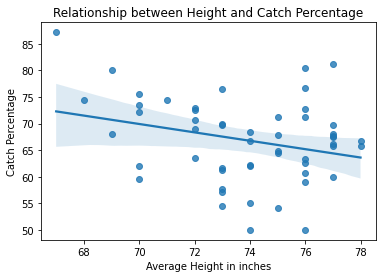

In [80]:
sns.regplot(data=df, x='Height', y='CTCH%')
plt.title("Relationship between Height and Catch Percentage")
plt.xlabel("Average Height in inches")
plt.ylabel("Catch Percentage")
plt.show()

In [35]:
#Correlation between height and catch percentage
df[['Height', 'CTCH%']].corr()

,Height,CTCH%
Height,1.000000,-0.277025
CTCH%,-0.277025,1.000000


### Q2

In [36]:
#Summary Statistics of average seperation in yds
summary(df['SEP'])

,value
min,2.200
Q1,2.700
med,3.000
Q3,3.400
max,4.400
mean,3.079
std,0.536
var,0.287
range,2.200


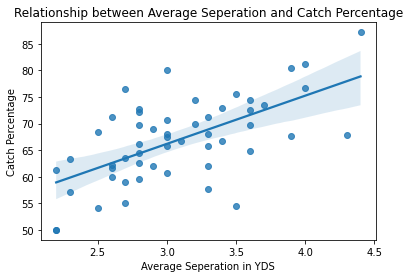

In [79]:
sns.regplot(data=df, x='SEP', y='CTCH%')
plt.title("Relationship between Average Seperation and Catch Percentage")
plt.xlabel("Average Seperation in YDS")
plt.ylabel("Catch Percentage")
plt.show()

In [38]:
#Correlation between average seperation and catch percentage
df[['SEP', 'CTCH%']].corr()

,SEP,CTCH%
SEP,1.000000,0.618185
CTCH%,0.618185,1.000000


### Q3

In [39]:
#Summary Statistics of WR CTCH% in yds
summary(df['CTCH%'][df['POS'] == "WR"])

,value
min,50.000
Q1,60.000
med,64.860
Q3,72.220
max,87.180
mean,65.696
std,8.475
var,71.828
range,37.180


In [40]:
#Summary Statistics of TE CTCH% in yds
summary(df['CTCH%'][df['POS'] == "TE"])

,value
min,63.270
Q1,66.105
med,67.755
Q3,71.545
max,81.130
mean,69.697
std,5.435
var,29.543
range,17.860


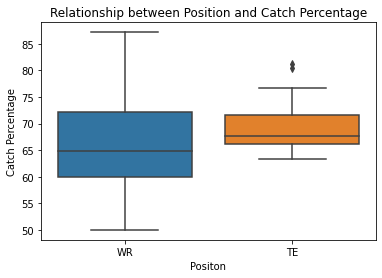

In [41]:
sns.boxplot(data=df, x='POS', y='CTCH%')
plt.title("Relationship between Position and Catch Percentage")
plt.xlabel("Positon")
plt.ylabel("Catch Percentage")
plt.show()

### Q4

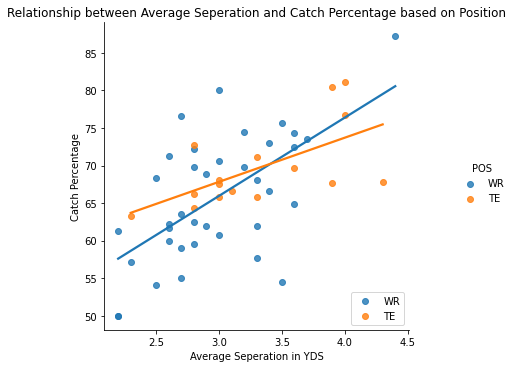

In [81]:
sns.lmplot(data=df, x='SEP', y='CTCH%', hue='POS', ci=None)
plt.title("Relationship between Average Seperation and Catch Percentage based on Position")
plt.xlabel("Average Seperation in YDS")
plt.ylabel("Catch Percentage")
plt.legend(loc='lower right')
plt.show()

In [43]:
#Summary Statistics for WR catch percentage
summary(df['CTCH%'][df['POS'] == "WR"])

,value
min,50.000
Q1,60.000
med,64.860
Q3,72.220
max,87.180
mean,65.696
std,8.475
var,71.828
range,37.180


In [44]:
#Summary Statistics for WR average seperation
summary(df['SEP'][df['POS'] == "WR"])

,value
min,2.200
Q1,2.600
med,2.900
Q3,3.300
max,4.400
mean,2.976
std,0.494
var,0.244
range,2.200


In [45]:
#Summary Statistics for TE catch percentage
summary(df['CTCH%'][df['POS'] == "TE"])

,value
min,63.270
Q1,66.105
med,67.755
Q3,71.545
max,81.130
mean,69.697
std,5.435
var,29.543
range,17.860


In [46]:
#Summary Statistics for TE average seperation
summary(df['SEP'][df['POS'] == "TE"])

,value
min,2.300
Q1,2.950
med,3.200
Q3,3.900
max,4.300
mean,3.319
std,0.568
var,0.323
range,2.000


In [47]:
#Correlation between WR average seperation and catch percentage
df[['SEP', 'CTCH%']][df['POS'] == 'WR'].corr()

,SEP,CTCH%
SEP,1.000000,0.607345
CTCH%,0.607345,1.000000


In [48]:
#Correlation between TE average seperation and catch percentage
df[['SEP', 'CTCH%']][df['POS'] == 'TE'].corr()

,SEP,CTCH%
SEP,1.000000,0.614894
CTCH%,0.614894,1.000000


### Conclusion

**Q1 Conclusion:** To determine the relationship between catch percentage and height, I created a scatterplot, looked at the summary stats and found the correlation coefficient.

The strength between these two variables is actually quite weak. They actually have a negative relationship. This is shown in the graph first with the line of best fit being negative. The form of the scatterplot is linear, but negative. There are some outliers but most of the data is quite spread out. Then it is shown because the correlation coefficient of the two values is -0.277.

**Q2 Conclusion:** To determine the relationship between average seperation and catch percentage I looked at a scatterplot and found the correlation coefficient.

I found that there is a moderate correlation between the average yards of seperation and catch percentage. The scatterplot is linear and the line of best fit has a positive slope. Also, there are not many outliers, there may be a few at the bottom. The correlation coefficient is 0.61 which is not strong, but enough to show that there is a correlation.

**Q3 Conclusion:** To determine the relationship between positon and catch percentage I looked at a boxplot and analyzed summary statistics.

First I looked at summary statistics. The first thing that jumps out at me is the mean catch percentage for TEs is almost 69.69% while for WRs it is only 65.69. Most of the TE summary statistics seem to be higher. This makes sense, because usually tight ends will have shorter routes and are more open. WRs have risker throws that are farther usually. Then I looked at the boxplot. For the boxplot, the WR whiskers are much higher and lower, indicating there are values with a bigger range, which is shown in the summary stats too. The median of the TE is higher. But, there are outliers for TE which are all high, not a bad thing, while for WR there are no outliers. The IQR is higher for WRs as well. 
From the boxplots it seems like the TEs are thrown less balls, but they have a higher catch percentage while WRs are thrown more balls with a lower average catch percentage.

**Q4 Conclusion:** To determine the relationship between average seperation and catch percentage based on position I looked at a scatterplot, analyzed summary statistics, and looked at correlation coefficients.

First I looked at the scatterplot. Both the TE and WR lines of best fit are positive which shows positive correlation. I found that the exact correlation coefficient for WR is 0.607 and for TE is 0.614. The slope of the TE line is steeper. Both sets of data are linear but the TE one is much more linear. There are almost no TE outliers. For WR, there are many more points, thought the data is so large there really is not many outliers. Then I looked at the summary statistics. In Q3 I covered the summary statistics of catch percentage based on position but now I look at the average seperation based on position, which is actually much more interesting because of the different routes run by different positions. Based on the statistics it seems like tight ends get much more seperation than wide recievers. I found this by looking at the mainly the mean. The mean for tight ends is 3.319 and for 2.976. This could be the reason why tight ends tend to have a higher catch percentage, it is because they have more space to catch the ball. I believe that tight ends have a higher seperation because their routes are designed to be short and quick. Also, they usually have Linebackers covering them, who are not as good in coverage as Cornerbacks.

## 3. Inference

### Overview

The following research question will be answered in this section:

**Q5: Is there sufficient evidence to suggest that there is an association between catch percentage and being a higher target reciever (generates > 18% of teams air yards) in all NFL recievers?**

For this question, I wanted to examine the relationship between being a high target reciever and how much a player catches the ball. I did this because I thought about how great recievers that come from a small school where they are the whole offense could translate to the NFL. I chose 18% or more of a teams passing yards to be the threshold because it was the median so anything above it would be above average.

### Q5
Sampling difference of sample means:

H<sub>o</sub> : CTCH%<sub>higher TAY%</sub> - CTCH%<sub>higher TAY%</sub> = 0 <br> 
H<sub>a</sub> : CTCH%<sub>lower TAY%</sub> - CTCH%<sub> lowerTAY%</sub> ≠  0

In [98]:
#Had to add a column showing which recievers get higher targets and which get lower, 18 is median that 
#is why i chose the number
df['Targets'] = np.where(df['TAY%']>= 18 , "Higher", "Lower")
df.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,TD,CUSH,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,4,6.6,3.5,11.6,38.27,75.65,4.7,4.0,0.6,Higher
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,5,5.6,3.2,10.3,42.62,69.83,5.8,4.6,1.2,Higher
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,9,5.5,3.0,11.2,37.93,70.59,4.3,3.4,0.9,Higher
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,10,5.8,3.3,11.2,41.20,57.72,5.3,4.7,0.5,Higher
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,7,5.5,2.6,10.8,40.62,61.63,6.6,5.1,1.6,Higher


In [50]:
#The dataset is already a random sample so I do not need to sample
df_higher = df[df['Targets'] == "Higher"]
df_higher.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,TD,CUSH,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,4,6.6,3.5,11.6,38.27,75.65,4.7,4.0,0.6,Higher
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,5,5.6,3.2,10.3,42.62,69.83,5.8,4.6,1.2,Higher
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,9,5.5,3.0,11.2,37.93,70.59,4.3,3.4,0.9,Higher
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,10,5.8,3.3,11.2,41.20,57.72,5.3,4.7,0.5,Higher
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,7,5.5,2.6,10.8,40.62,61.63,6.6,5.1,1.6,Higher


In [51]:
#The dataset is already a random sample so I do not need to sample
df_lower = df[df['Targets'] == "Lower"]
df_lower.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,TD,CUSH,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets
14,Chris Godwin,TB,WR,14,73,208,2/27/96,60,86,581,2,6.8,2.8,6.1,15.59,69.77,5.0,4.1,0.9,Lower
16,Dallas Goedert,PHI,TE,88,77,256,1/3/95,43,53,544,3,6.2,4.0,4.9,11.15,81.13,8.6,6.8,1.8,Lower
22,Parris Campbell,IND,WR,1,72,208,7/16/97,46,63,454,3,6.6,3.4,6.1,14.24,73.02,5.4,4.2,1.2,Lower
23,DeAndre Carter,LAC,WR,1,68,190,4/10/93,38,51,452,3,6.5,3.2,9.1,15.96,74.51,4.5,4.8,-0.4,Lower
26,Tyler Higbee,LAR,TE,89,78,255,1/1/93,48,73,430,0,6.0,3.3,3.5,10.53,65.75,5.7,5.7,0.0,Lower


In [52]:
print("Size of higher is", df_higher.shape[0], ". The size of lower is", df_lower.shape[0])

Size of higher is 28 . The size of lower is 25


In [53]:
higher_mean = df_higher['CTCH%'].mean()
higher_mean

64.08857142857143

In [54]:
lower_mean = df_lower['CTCH%'].mean()
lower_mean

70.05720000000001

In [55]:
higher_std = df_higher['CTCH%'].std()
higher_std

6.013848040478598

In [56]:
lower_std = df_lower['CTCH%'].std()
lower_std

8.565235704092835

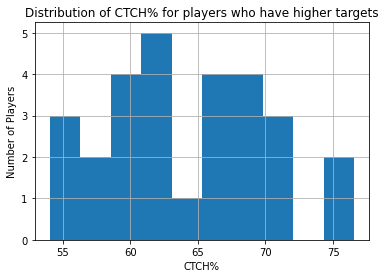

In [57]:
df_higher['CTCH%'].hist()
plt.title("Distribution of CTCH% for players who have higher targets")
plt.xlabel("CTCH%")
plt.ylabel("Number of Players")
plt.show()

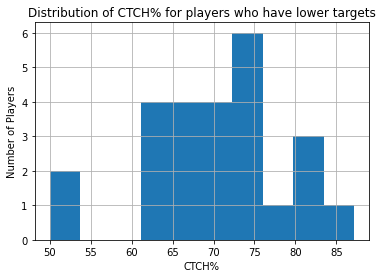

In [58]:
df_lower['CTCH%'].hist()
plt.title("Distribution of CTCH% for players who have lower targets")
plt.xlabel("CTCH%")
plt.ylabel("Number of Players")
plt.show()

**Checking conditions for inference**

Assuming that n1 is higher targets and n2 is lower targets. n of higher = 28 n of lower = 25<br>
n1 is randomly sampled.<br>
n1 (28) !> 30<br>
n1 (28) < 10% of population of recievers in NFL.<br>
n2 is randomly sampled.<br>
n2 (25) !> 30<br>
n2 (25) < 10 % of population of recievers in NFL.<br>

The conditions are not all met but we will proceed with caution.

In [59]:
standard_error=np.sqrt(((higher_std**2)/28) + ((lower_std**2)/25))
standard_error

2.0557690813262472

In [60]:
test_statistic=(higher_mean-lower_mean-0)/ standard_error
test_statistic

-2.903355549825671

In [61]:
pvalue=2*(1-t.cdf(np.abs(test_statistic), df=27))
pvalue

0.007271729550423656

### Conclusion

**Q5 Conclusion:** Because the p-value = 0.0007 <  𝛼=0.01, we must reject the null hypothesis. There is sufficient evidence to suggest the alternative hypothesis. There is sufficient evidence to suggest an association in the population between the catch percentage being different based on a higher or lower targeted player. 

## 4. Linear Regression

### Overview

The following research questions will be answered in this section:

**Q6: Is there a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in the sample?**

**Q7:Is there sufficient evidence to suggest that there is a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in all NFL recievers?**

I chose these 4 variables because I wanted to predict recieving yards. Recieving yards is one of if not the most important statistic when it comes to wide recievers. This is key to figure out how productive a reciever is. The four stats I chose, heavily affect the overall recieving yards. The catch percentage affects the catches the player makes for yards. The Targeted Air Yards percentage is the percent of air yards for the offence the reciever is given; in other words it is the share of team passing yards for the player. The yards after catch per reception is an extremely important stat because it is the amount of yards the reciever generates by themseleves after they catch the ball. The seperation is how good a reciever can create space and run their routes. All factors affect total yards and I was intruiged to examine the relationships.

### Q6

In [62]:
#There were problems with the % in the variable names with smf.ols so I am renaming them in a dataframe for
#linear regression
df_regress = df[['YDS', 'CTCH%', 'TAY%', 'YAC/R', 'SEP']]
df_regress = df_regress.rename(columns={"CTCH%": "CTCHp", "TAY%": "TAYp", "YAC/R" : "YAC"})
df_regress.head()

,YDS,CTCHp,TAYp,YAC,SEP
0,1233,75.65,38.27,4.7,3.5
1,1232,69.83,42.62,5.8,3.2
2,1110,70.59,37.93,4.3,3.0
3,999,57.72,41.20,5.3,3.3
4,831,61.63,40.62,6.6,2.6


**Q6: Is there a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in the sample?**

In [69]:
df_regress[['YDS', 'CTCHp', 'TAYp', 'YAC', 'SEP']].corr()

,YDS,CTCHp,TAYp,YAC,SEP
YDS,1.000000,0.053558,0.863971,0.204392,-0.100536
CTCHp,0.053558,1.000000,-0.316114,0.410620,0.618185
TAYp,0.863971,-0.316114,1.000000,-0.072972,-0.367152
YAC,0.204392,0.410620,-0.072972,1.000000,0.578099
SEP,-0.100536,0.618185,-0.367152,0.578099,1.000000


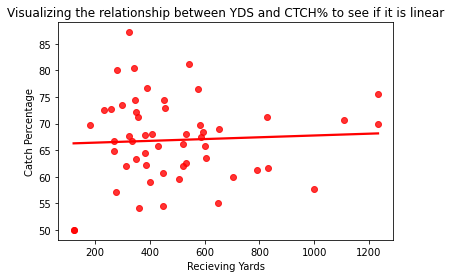

In [86]:
sns.regplot(data=df_regress, x='YDS', y='CTCHp', ci=None, color='red')
plt.title("Visualizing the relationship between YDS and CTCH% to see if it is linear")
plt.xlabel("Recieving Yards")
plt.ylabel("Catch Percentage")
plt.show()

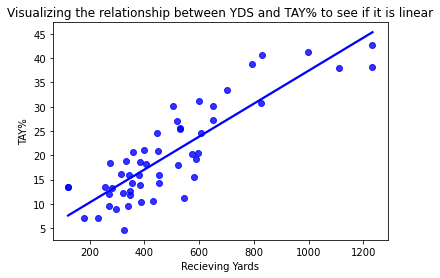

In [89]:
sns.regplot(data=df_regress, x='YDS', y='TAYp', ci=None, color='blue')
plt.title("Visualizing the relationship between YDS and TAY% to see if it is linear")
plt.xlabel("Recieving Yards")
plt.ylabel("TAY%")
plt.show()

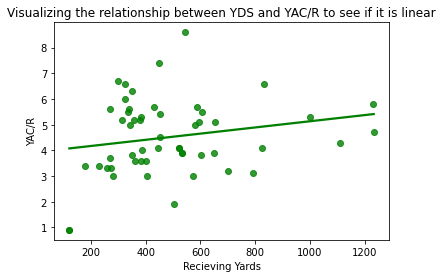

In [91]:
sns.regplot(data=df_regress, x='YDS', y='YAC', ci=None, color='green')
plt.title("Visualizing the relationship between YDS and YAC/R to see if it is linear")
plt.xlabel("Recieving Yards")
plt.ylabel("YAC/R")
plt.show()

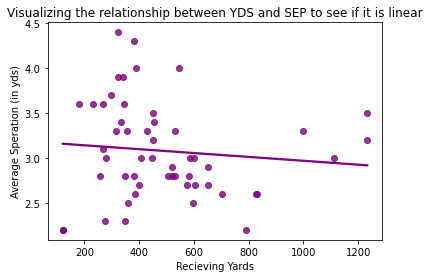

In [93]:
sns.regplot(data=df_regress, x='YDS', y='SEP', ci=None, color='purple')
plt.title("Visualizing the relationship between YDS and SEP to see if it is linear")
plt.xlabel("Recieving Yards")
plt.ylabel("Average Speration (in yds)")
plt.show()

### Q7

In [70]:
model = smf.ols('YDS ~ CTCHp+TAYp+YAC+SEP', data=df_regress).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    YDS   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     92.40
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           6.29e-22
Time:                        17:46:05   Log-Likelihood:                -310.00
No. Observations:                  53   AIC:                             630.0
Df Residuals:                      48   BIC:                             639.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -740.9385    125.618     -5.898      0.000    -993.510    -488.367
CTCHp          9.9101      2.008      4.936      0.000       5.873      13.947
TAYp          24.4788      1.377     17.778      0.000      21.710      27.247
YAC           28.5971     10.423      2.744      0.009       7.640      49.554
SEP          -17.5307     34.052     -0.515      0.609     -85.996      50.935
==============================================================================
Omnibus:                        0.568   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.581
Skew:                           0.231   Prob(JB):                        0.748
Kurtosis:                       2.775   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Equation:**<br>
$\hat{YDS}$ = -740.9385 + 9.9101CTCH%	+ 24.4788TAY% + 28.5971YAC/R - 17.5307SEP

The model fits well, the R^2 is 0.885 which is strong.

**Checking conditions for inference**

1. Linearity: Because the amount of positive and negative residuals is roughly even, this condition is met.
2. Constant Variability of Residuals: Because the residual spread is slightly different, especially on the right, this condition is not met.
3. Normality of residuals: Because the residuals are slightly skewed left, this condition is not met.
4. Independence of residuals: This condition is not violated because the sample is randomly selected and the n is 53 which is less than 10% of the population.
5. No Multicollinearity Condition: Because no two explanatory variables have a strong linear relationship, this condition is met.

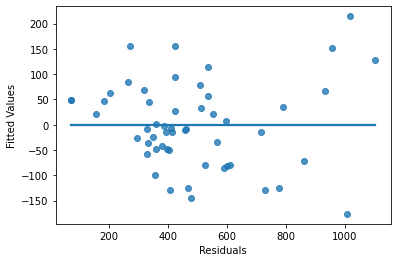

In [71]:
sns.regplot(x=model.fittedvalues, y=model.resid, ci=None)
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.show()

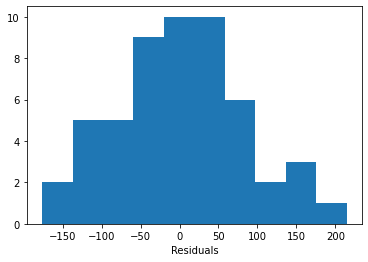

In [72]:
plt.hist(model.resid)
plt.xlabel("Residuals")
plt.show()

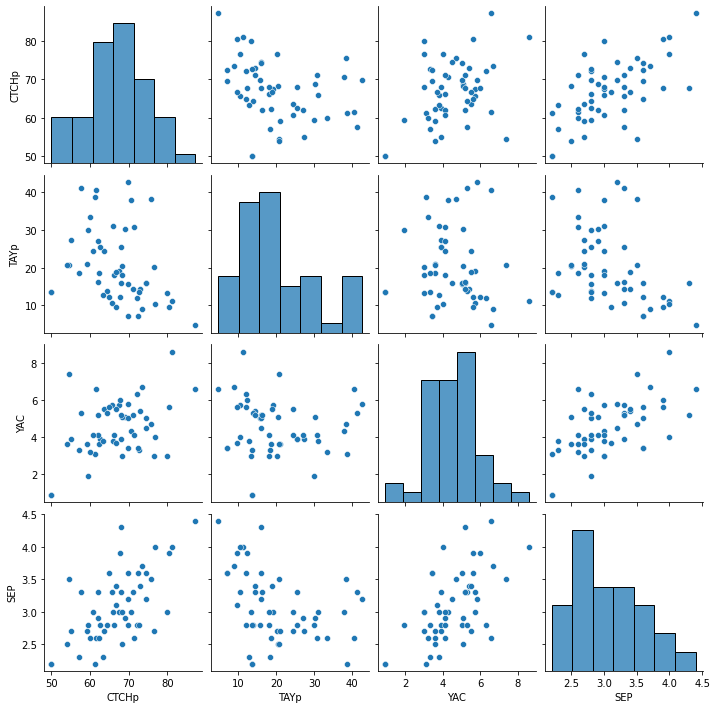

In [73]:
sns.pairplot(df_regress[['CTCHp', 'TAYp', 'YAC', 'SEP']])
plt.show()

In [74]:
df_regress[['CTCHp', 'TAYp', 'YAC', 'SEP']].corr()

,CTCHp,TAYp,YAC,SEP
CTCHp,1.000000,-0.316114,0.410620,0.618185
TAYp,-0.316114,1.000000,-0.072972,-0.367152
YAC,0.410620,-0.072972,1.000000,0.578099
SEP,0.618185,-0.367152,0.578099,1.000000


H<sub>o</sub> : _B<sub>1</sub>_ = _B<sub>2</sub>_ = _B<sub>3</sub>_ = _B<sub>4</sub>_  = 0<br> 
H<sub>a</sub> : at least one _B<sub>i</sub>_ ≠ 0 (for i = 1,2,3,4)

*P values*<br> 
CTCH% _B<sub>1</sub>_ = 0.000 < $\alpha=0.01.$ <br> 
TAY% _B<sub>2</sub>_ = 0.000 < $\alpha=0.01.$ <br> 
YAC/R _B<sub>3</sub>_ = 0.009 < $\alpha=0.01.$ <br> 
SEP _B<sub>4</sub>_ = 0.609 > $\alpha=0.01.$ <br> 

### Conclusion

**Q6: Is there a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in the sample?**<br>
In conclusion, the results of this expiriment yeilded that the CTCH%, TAY%, and YAC/R all have positive linear relationships in the sample. The CTCH% and YAC/R both have positive relationships but they are quite weak only being correlated 0.05 and 0.2 respectively. THe TAY% has a stronger positive relationship, the correlation coefficient is 0.86 and the scatterplot is quite strong. The SEP variable has a negative relationship and the correlation is -0.1.
    
**Q7:Is there sufficient evidence to suggest that there is a linear relationship between YDS and CTCH%,TAY%,YAC/R, and SEP in all NFL recievers?**
In conclusion, we have sufficient evidence to suggest that the CTCH%, TAY%, and YAC/R slopes will be non-zero, or linear, because the pvalues are less than the alpha value of 0.01. We cannot suggest the same for SEP because the pvalue of 0.609 is greater than the alpha value of 0.01. This means that we would expect the relationship between YDS and CTCH%, TAY%, and YAC/R to be linear for all NFL recievers.

## 5. Logistic Regression

### Overview

The following research questions will be answered in this section:

**Q8: What explanatory variables should we include in the model that predicts if a player will have a higher catch percentage to build a parsimonious model?**

**Q9:Is there a linear relationship between the log-odds of the success level of Catch Percentage and Average Seperation,Height,Average Cushion, and Targeted Air Yards in all NFL Wide Recievers?**

I chose to explore the 4 variables of seperation, height, cushion, and targeted air yards because I wanted to see what stats can really go into a catch. Who is a good pass catcher and who is not. Do you have to be a certain height or be targeted a certain amount of times. I want to find out. In this section I decided to use a categorical responce variable from the Catch percentage category. I determined a player to be a good pass catcher if they were above average and bad if they were below average.

### Q8

In [101]:
df['Catch'] = np.where(df['CTCH%']>= 67.53 , "Good", "Bad")
df.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,CUSH,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets,Catch
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,...,6.6,3.5,11.6,38.27,75.65,4.7,4.0,0.6,Higher,Good
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,...,5.6,3.2,10.3,42.62,69.83,5.8,4.6,1.2,Higher,Good
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,...,5.5,3.0,11.2,37.93,70.59,4.3,3.4,0.9,Higher,Good
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,...,5.8,3.3,11.2,41.20,57.72,5.3,4.7,0.5,Higher,Bad
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,...,5.5,2.6,10.8,40.62,61.63,6.6,5.1,1.6,Higher,Bad


In [102]:
df['y'] = df['Catch'].map({"Bad" : 0, "Good" : 1})
df.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets,Catch,y
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,...,3.5,11.6,38.27,75.65,4.7,4.0,0.6,Higher,Good,1
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,...,3.2,10.3,42.62,69.83,5.8,4.6,1.2,Higher,Good,1
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,...,3.0,11.2,37.93,70.59,4.3,3.4,0.9,Higher,Good,1
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,...,3.3,11.2,41.20,57.72,5.3,4.7,0.5,Higher,Bad,0
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,...,2.6,10.8,40.62,61.63,6.6,5.1,1.6,Higher,Bad,0


In [117]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=123)

In [118]:
print("Size", df_train.shape[0])
df_train.head()

Size 42


,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets,Catch,y
5,Tee Higgins,CIN,WR,85,76,219,1/18/99,57,80,826,...,2.6,11.1,30.80,71.25,4.1,3.2,0.9,Higher,Good,1
10,Ja'Marr Chase,CIN,WR,1,72,201,3/1/00,47,74,605,...,2.7,9.6,24.51,63.51,5.5,3.7,1.8,Higher,Bad,0
21,Diontae Johnson,PIT,WR,18,70,183,7/5/96,56,94,505,...,2.8,10.0,30.07,59.57,1.9,2.6,-0.7,Higher,Bad,0
8,Brandon Aiyuk,SF,WR,11,72,200,3/17/98,51,74,652,...,2.9,9.7,30.24,68.92,5.1,4.6,0.5,Higher,Good,1
12,Tyler Boyd,CIN,WR,83,74,203,11/15/94,41,60,595,...,2.5,9.8,20.42,68.33,5.1,3.6,1.5,Higher,Good,1


In [119]:
print("Size", df_test.shape[0])
df_test.head()

Size 11


,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets,Catch,y
36,Juwan Johnson,NO,TE,83,76,231,9/13/96,31,49,349,...,2.3,9.1,12.67,63.27,3.8,2.4,1.4,Lower,Bad,0
26,Tyler Higbee,LAR,TE,89,78,255,1/1/93,48,73,430,...,3.3,3.5,10.53,65.75,5.7,5.7,0.0,Lower,Bad,0
48,Austin Hooper,TEN,TE,81,76,254,10/29/94,24,33,257,...,2.8,8.6,13.54,72.73,3.3,2.9,0.4,Lower,Good,1
23,DeAndre Carter,LAC,WR,1,68,190,4/10/93,38,51,452,...,3.2,9.1,15.96,74.51,4.5,4.8,-0.4,Lower,Good,1
13,T.J. Hockenson,MIN,TE,87,77,244,7/3/97,52,77,587,...,3.0,7.0,19.21,67.53,5.7,3.5,2.2,Higher,Good,1


In [126]:
#Smf.ols would not recognize the % symbol
df_train = df_train.rename(columns={"CTCH%": "CTCHp", "TAY%": "TAYp"})
df_test = df_train.rename(columns={"CTCH%": "CTCHp", "TAY%": "TAYp"})
current_mod = smf.logit('y ~ SEP+Height+CUSH+TAYp', data=df_train).fit()
current_mod.summary()

Optimization terminated successfully.
         Current function value: 0.528071
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            4
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2369
Time:                        22:50:00   Log-Likelihood:                -22.179
converged:                       True   LL-Null:                       -29.065
Covariance Type:            nonrobust   LLR p-value:                  0.008063
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0966     15.356      0.788      0.431     -18.001      42.194
SEP            2.3708      0.918      2.583      0.010       0.572       4.169
Height        -0.2021      0.185     -1.093      0.274      -0.564       0.160
CUSH          -0.5896      0.633     -0.931      0.352      -1.830       0.651
TAYp          -0.0426      0.045     -0.956      0.339      -0.130       0.045
==============================================================================
"""

In [127]:
print('ITERATION 1: BIC of the current model:', current_mod.bic)

ITERATION 1: BIC of the current model: 63.04634544649709


In [128]:
test_mod1 = smf.logit('y ~ SEP+Height+CUSH', data=df_train).fit()
print('BIC of model that deletes TAY%:', test_mod1.bic)

Optimization terminated successfully.
         Current function value: 0.539185
         Iterations 6
BIC of model that deletes TAY%: 60.24223974322592


In [129]:
test_mod2 = smf.logit('y ~ SEP+Height+TAYp', data=df_train).fit()
print('BIC of model that deletes CUSH:', test_mod2.bic)

Optimization terminated successfully.
         Current function value: 0.538569
         Iterations 6
BIC of model that deletes CUSH: 60.19044758201383


In [130]:
test_mod3 = smf.logit('y ~ SEP+CUSH+TAYp', data=df_train).fit()
print('BIC of model that deletes Height', test_mod3.bic)

Optimization terminated successfully.
         Current function value: 0.543293
         Iterations 6
BIC of model that deletes Height 60.587260280406916


In [131]:
test_mod4 = smf.logit('y ~ Height+CUSH+TAYp', data=df_train).fit()
print('BIC of model that deletes SEP', test_mod4.bic)

Optimization terminated successfully.
         Current function value: 0.637447
         Iterations 5
BIC of model that deletes SEP 68.49620840735378


In [132]:
current_mod = smf.logit('y ~ SEP+Height+TAYp', data=df_train).fit()
current_mod.summary()

Optimization terminated successfully.
         Current function value: 0.538569
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2217
Time:                        22:55:07   Log-Likelihood:                -22.620
converged:                       True   LL-Null:                       -29.065
Covariance Type:            nonrobust   LLR p-value:                  0.004882
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4051     13.312      0.406      0.685     -20.687      31.497
SEP            2.1516      0.843      2.554      0.011       0.500       3.803
Height        -0.1547      0.174     -0.887      0.375      -0.496       0.187
TAYp          -0.0295      0.042     -0.704      0.481      -0.112       0.053
==============================================================================
"""

In [133]:
print('ITERATION 2: BIC of the current model:', current_mod.bic)

ITERATION 2: BIC of the current model: 60.19044758201383


In [134]:
test_mod1 = smf.logit('y ~ SEP+Height', data=df_train).fit()
print('BIC of model that deletes TAY%:', test_mod1.bic)

Optimization terminated successfully.
         Current function value: 0.544550
         Iterations 6
BIC of model that deletes TAY%: 56.95524620672643


In [135]:
test_mod3 = smf.logit('y ~ SEP+TAYp', data=df_train).fit()
print('BIC of model that deletes Height', test_mod3.bic)

Optimization terminated successfully.
         Current function value: 0.548381
         Iterations 6
BIC of model that deletes Height 57.27697816326827


In [136]:
test_mod4 = smf.logit('y ~ Height+TAYp', data=df_train).fit()
print('BIC of model that deletes SEP', test_mod4.bic)

Optimization terminated successfully.
         Current function value: 0.638912
         Iterations 5
BIC of model that deletes SEP 64.88165804723499


In [142]:
final_mod = smf.logit('y ~ SEP+Height', data=df_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.544550
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2131
Time:                        22:59:40   Log-Likelihood:                -22.871
converged:                       True   LL-Null:                       -29.065
Covariance Type:            nonrobust   LLR p-value:                  0.002043
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7474     12.008      0.146      0.884     -21.787      25.282
SEP            2.3367      0.805      2.904      0.004       0.759       3.914
Height        -0.1215      0.164     -0.741      0.459      -0.443       0.200
==============================================================================
"""

**Regression Equation:** log(p hat / 1 - p hat) = 1.7474 + 2.3367SEP - 0.1215Height

In [145]:
phat_test = final_mod.predict(exog=df_test)
phat_test.head(10)

5     0.196415
10    0.334189
21    0.447028
8     0.444738
12    0.197882
18    0.280596
50    0.691342
1     0.588458
6     0.121411
27    0.355343
dtype: float64

In [146]:
df_test['phat_test'] = phat_test
df_test.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,TAY,TAYp,CTCHp,YAC/R,xYAC/R,+/-,Targets,Catch,y,phat_test
5,Tee Higgins,CIN,WR,85,76,219,1/18/99,57,80,826,...,11.1,30.80,71.25,4.1,3.2,0.9,Higher,Good,1,0.196415
10,Ja'Marr Chase,CIN,WR,1,72,201,3/1/00,47,74,605,...,9.6,24.51,63.51,5.5,3.7,1.8,Higher,Bad,0,0.334189
21,Diontae Johnson,PIT,WR,18,70,183,7/5/96,56,94,505,...,10.0,30.07,59.57,1.9,2.6,-0.7,Higher,Bad,0,0.447028
8,Brandon Aiyuk,SF,WR,11,72,200,3/17/98,51,74,652,...,9.7,30.24,68.92,5.1,4.6,0.5,Higher,Good,1,0.444738
12,Tyler Boyd,CIN,WR,83,74,203,11/15/94,41,60,595,...,9.8,20.42,68.33,5.1,3.6,1.5,Higher,Good,1,0.197882


In [148]:
fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])


In [149]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve(area = '+str(round(auc, 3)) +')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

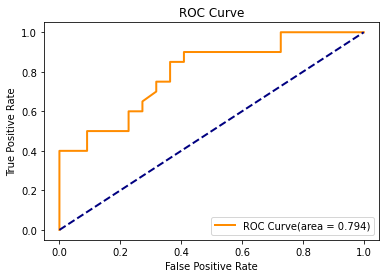

In [150]:
plot_roc(fpr, tpr, auc)

The AUC for this dataset is around 0.794 which is relatively high. This tells us that there does exist some predictive probability threshold that gets somewhere close to giving us the ideal scenario of a model with a false positive of 0 and a true positive of 1 with new data.

In [154]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn+tp)
    fpr = fp / (fp+tn)
    return pd.DataFrame({'Threshold' : [thresh], 'tpr' : [tpr], 'fpr' : [fpr]})

In [156]:
for thresh in np.arange(0, 1, .01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   Threshold  tpr  fpr
0        0.0  1.0  1.0
   Threshold  tpr  fpr
0       0.01  1.0  1.0
   Threshold  tpr  fpr
0       0.02  1.0  1.0
   Threshold  tpr  fpr
0       0.03  1.0  1.0
   Threshold  tpr  fpr
0       0.04  1.0  1.0
   Threshold  tpr  fpr
0       0.05  1.0  1.0
   Threshold  tpr  fpr
0       0.06  1.0  1.0
   Threshold  tpr  fpr
0       0.07  1.0  1.0
   Threshold  tpr  fpr
0       0.08  1.0  1.0
   Threshold  tpr       fpr
0       0.09  1.0  0.954545
   Threshold  tpr       fpr
0        0.1  1.0  0.954545
   Threshold  tpr       fpr
0       0.11  1.0  0.909091
   Threshold  tpr       fpr
0       0.12  1.0  0.909091
   Threshold  tpr       fpr
0       0.13  1.0  0.863636
   Threshold  tpr       fpr
0       0.14  1.0  0.863636
   Threshold  tpr       fpr
0       0.15  1.0  0.818182
   Threshold  tpr       fpr
0       0.16  1.0  0.818182
   Threshold  tpr       fpr
0       0.17  1.0  0.818182
   Threshold  tpr       fpr
0       0.18  1.0  0.727273
   Threshold  tpr       fp

I will choose the predictive probability threshold of 0.35 because it yeilds a somewhat high true positive rate of 0.85 while still keeping the false positive rate at 0.36. If I go any higher, the false positive rate will be 0.40 which I believe will be too high. If the model is meant to be able to predict what a player coming out of college's CTCH% will be, getting it wrong will not be good. Drafting a player is putting a lot of money and time into them.

In [163]:
pred_probabilities=final_mod.predict(exog=dict(df_test))
df_test['predictive_prob']=pred_probabilities
df_test.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,TAYp,CTCHp,YAC/R,xYAC/R,+/-,Targets,Catch,y,phat_test,predictive_prob
5,Tee Higgins,CIN,WR,85,76,219,1/18/99,57,80,826,...,30.80,71.25,4.1,3.2,0.9,Higher,Good,1,0.196415,0.196415
10,Ja'Marr Chase,CIN,WR,1,72,201,3/1/00,47,74,605,...,24.51,63.51,5.5,3.7,1.8,Higher,Bad,0,0.334189,0.334189
21,Diontae Johnson,PIT,WR,18,70,183,7/5/96,56,94,505,...,30.07,59.57,1.9,2.6,-0.7,Higher,Bad,0,0.447028,0.447028
8,Brandon Aiyuk,SF,WR,11,72,200,3/17/98,51,74,652,...,30.24,68.92,5.1,4.6,0.5,Higher,Good,1,0.444738,0.444738
12,Tyler Boyd,CIN,WR,83,74,203,11/15/94,41,60,595,...,20.42,68.33,5.1,3.6,1.5,Higher,Good,1,0.197882,0.197882


In [165]:
df_test['yhat']=1*(df_test['predictive_prob']>0.35)
df_test.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,CTCHp,YAC/R,xYAC/R,+/-,Targets,Catch,y,phat_test,predictive_prob,yhat
5,Tee Higgins,CIN,WR,85,76,219,1/18/99,57,80,826,...,71.25,4.1,3.2,0.9,Higher,Good,1,0.196415,0.196415,0
10,Ja'Marr Chase,CIN,WR,1,72,201,3/1/00,47,74,605,...,63.51,5.5,3.7,1.8,Higher,Bad,0,0.334189,0.334189,0
21,Diontae Johnson,PIT,WR,18,70,183,7/5/96,56,94,505,...,59.57,1.9,2.6,-0.7,Higher,Bad,0,0.447028,0.447028,1
8,Brandon Aiyuk,SF,WR,11,72,200,3/17/98,51,74,652,...,68.92,5.1,4.6,0.5,Higher,Good,1,0.444738,0.444738,1
12,Tyler Boyd,CIN,WR,83,74,203,11/15/94,41,60,595,...,68.33,5.1,3.6,1.5,Higher,Good,1,0.197882,0.197882,0


In [169]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat']).ravel()
(tn, fp, fn, tp)

(14, 8, 3, 17)

In [172]:
print("The true positive rate is", tp/(tp+fn), "for this dataset.")

The true positive rate is 0.85 for this dataset.


In [177]:
print("The false positive rate is", fp/(fp+tn), "for this dataset.")

The false positive rate is 0.36363636363636365 for this dataset.


### Q9

In [178]:
df.head()

,PLAYER NAME,TEAM,POS,Num,Height,Weight,DOB,REC,TAR,YDS,...,SEP,TAY,TAY%,CTCH%,YAC/R,xYAC/R,+/-,Targets,Catch,y
0,Tyreek Hill,MIA,WR,10,70,191,3/1/94,87,115,1233,...,3.5,11.6,38.27,75.65,4.7,4.0,0.6,Higher,Good,1
1,Justin Jefferson,MIN,WR,18,73,195,1/16/99,81,116,1232,...,3.2,10.3,42.62,69.83,5.8,4.6,1.2,Higher,Good,1
2,Stefon Diggs,BUF,WR,14,72,191,11/29/93,84,119,1110,...,3.0,11.2,37.93,70.59,4.3,3.4,0.9,Higher,Good,1
3,Davante Adams,LV,WR,17,73,215,12/24/92,71,123,999,...,3.3,11.2,41.20,57.72,5.3,4.7,0.5,Higher,Bad,0
4,A.J. Brown,PHI,WR,11,73,226,6/30/97,53,86,831,...,2.6,10.8,40.62,61.63,6.6,5.1,1.6,Higher,Bad,0


In [184]:
q9_model = smf.logit('y ~ SEP+Height+CUSH+TAY', data=df).fit()
q9_model.summary()

Optimization terminated successfully.
         Current function value: 0.463511
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3311
Time:                        00:52:43   Log-Likelihood:                -24.566
converged:                       True   LL-Null:                       -36.727
Covariance Type:            nonrobust   LLR p-value:                 6.882e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2642     14.152      1.926      0.054      -0.474      55.002
SEP            1.7074      0.915      1.865      0.062      -0.086       3.501
Height        -0.3552      0.159     -2.233      0.026      -0.667      -0.043
CUSH          -0.3168      0.604     -0.524      0.600      -1.501       0.868
TAY           -0.4553      0.201     -2.260      0.024      -0.850      -0.060
==============================================================================
"""

**Linear Regression Equation:**<br>
log(phat / 1 - phat) = 27.2642 + 1.7074SEP - 0.3552Height - 0.3168CUSH - 0.4553TAY

**Checking conditions for inference**
1. Independence of Observations: This dataset is a random sample so it is met.
2. Linearity: There are S curves for all of the curves, even though some are negative.
3. No Multicollinearity Condition: Because no two explanatory variables have a strong linear relationship, this condition is met.

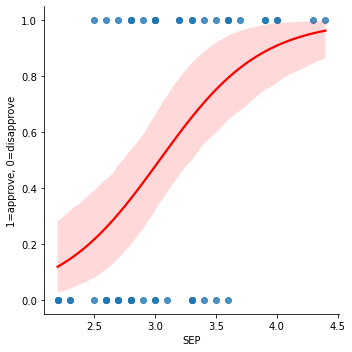

In [194]:
sns.lmplot(x='SEP', y='y', data=df, logistic=True, line_kws={'color': 'red'})
plt.ylabel('1=approve, 0=disapprove')
plt.show()

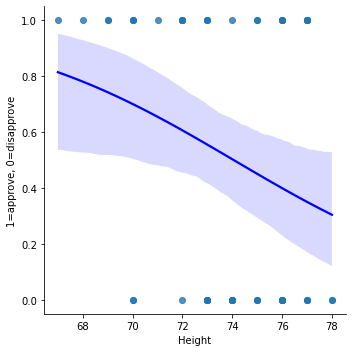

In [198]:
sns.lmplot(x='Height', y='y', data=df, logistic=True, line_kws={'color': 'blue'})
plt.ylabel('1=approve, 0=disapprove')
plt.show()

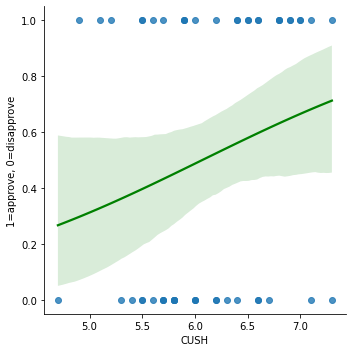

In [199]:
sns.lmplot(x='CUSH', y='y', data=df, logistic=True, line_kws={'color': 'green'})
plt.ylabel('1=approve, 0=disapprove')
plt.show()

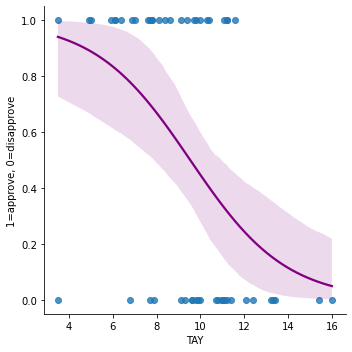

In [200]:
sns.lmplot(x='TAY', y='y', data=df, logistic=True, line_kws={'color': 'purple'})
plt.ylabel('1=approve, 0=disapprove')
plt.show()

In [187]:
df[['SEP', 'Height', 'CUSH', 'TAY']].corr()

,SEP,Height,CUSH,TAY
SEP,1.000000,-0.114363,0.351234,-0.572516
Height,-0.114363,1.000000,-0.379494,-0.048203
CUSH,0.351234,-0.379494,1.000000,-0.232908
TAY,-0.572516,-0.048203,-0.232908,1.000000


H<sub>o</sub> : _B<sub>1</sub>_ = _B<sub>2</sub>_ = _B<sub>3</sub>_ = _B<sub>4</sub>_  = 0<br> 
H<sub>a</sub> : at least one _B<sub>i</sub>_ ≠ 0 (for i = 1,2,3,4)

*P values*<br> 
SEP _B<sub>1</sub>_ = 0.062 > $\alpha=0.05.$ <br> 
Height _B<sub>2</sub>_ = 0.026 < $\alpha=0.05.$ <br> 
CUSH _B<sub>3</sub>_ = 0.600 > $\alpha=0.05.$ <br> 
TAY _B<sub>4</sub>_ = 0.024 < $\alpha=0.05.$ <br> 

### Conclusion

**Conclusion Q8**:

For this model, I found that using Average seperation and height found the best results. The BIC of the model was 56.995 which is the lowest I got. After fitting the roc curve and finding the predictive probability of 0.35, I fit the clssifier. Then I created a confusion matrix and got that true positive rate is 0.85 and the false positive rate is 0.36.

**Conclusion Q9:**

In conclusion, we have sufficient evidence to suggest that the Height and Targeted Air Yards will be non-zero, or linear, because the pvalues are less than the significince value of 0.05. We cannot suggest the same for SEP or Cushion because the pvalues of 0.062 and 0.600 are greater than the significince value of 0.05. This means that we would expect the relationship between Height and Targeted Air Yards to be linear for all NFL recievers.

## 6. Conclusion

### Summary
This expirement was very informative for me to see what goes into being a great reciever in the NFL. Honestly, throughout analysis, practice and skill seems to outweigh genetics by a lot. To begin I asked some questions examining the relationship between some original variables. I looked at the relationship between Catch Percentage and Height, which I believed would be related, but in fact they had a negative correlation and are not related. Then I examined the average seperation a player gets and the Catch Percentage, which had a moderate linear relationship. It makes sense, if a reciever can create more space, they will be able to catch the ball easier. After I looked at a categorical variable which is position, there were two in this dataset, Wide Reciever (WR) and Tight End (TE). To my suprise, tight ends have a higher catch percentage, on average. I took a step back and realized it makes sense as well with the shorter routes and worse coverage they face, usually. The last expirement in descriptive analytics I conducted was to put it all together. I looked at the relationship between catch percentage and seperation based on position and I found that Tight Ends get much less targets but on those do targets, they have a stronger relationship between seperation and catch percentage than tight ends. The descriptive analytics section could be used by scouts to determine the type of player needed to be drafter, whether a "safety blanket" reciever is needed or a high-risk high-reward reciever. Onto my inferential analysis, I examined the sampling difference of sample means between catch percentage of highly targeted recievers and lower targeted recievers in the population of all NFL recievers. I found the null hypothesis to be false and accepted that there is a difference if a player is highly targeted vs lowly targeted. This is a good fact for scouts to know looking at college players who are they're whole team, or just a piece of it. Next, I moved onto Linear Regression. Here I wanted to examine relationships between multiple advanced stats that play a part in overall recieving yards in the sample. I found that Catch percentage, Targeted Air Yards percentage, and yards after catch per reception have a positive linear relationship while seperation has a negative relationship with recieving yards. Then I tried to suggest the same claim in all NFL Wide Recievers and found that we do have sufficient evidence for those three to be linear among all recievers. So scouts, if you want a leading reciever, look at Catch percentage, Targeted Air Yards percentage, and yards after catch per reception! Lastly I took a look at Logistic Regression. The first question I tried to solve is which variables in the dataset would prove to create a more parsimonious model. I found that using average seperation and height yielded the best results with the BIC being lower here than anywhere else. Then I used a similar model (with two added fields being Targeted Air Yards and Cushion) to examine if there is a linear relationship between the log-odds of the success level of Catch Percentage and the variables. I found that Height and Targeted air yards would be linear and that seperation and cushion are not, at least for all NFL Recievers.

### Future Work
If I or someone else were to conduct future work based on these analyses, I would think they would find a way to incorporate college datasets. Maybe take a look at the recent draft class and how their numbers have shifted in the NFL and if these conclusions match, or need to be adjusted. I am sure my analysis has shortcomings. A major one is that the data is always changing, I ran this analysis of data from Week 12, which is midway through the 2022-2023 season. At the time I am writing this, week 13 has passed so the data has changed already. My parsimonious model could have been more efficient as well, but I would have needed to remove another explanatory variable, making it simple logistic regression and I wanted to keep two variables at least. It could have affected my results, but it was a calculated risk.